In [1]:
# Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# Import Prime data

prime_df = pd.read_csv("../CSV Resources/prime.csv")
prime_df = prime_df.set_index('Title')
prime_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Parks and Recreation,2009,16+,8.6,93%
Star Trek: The Next Generation,1987,7+,8.6,89%
The Good Wife,2009,16+,8.3,94%
Schitt's Creek,2015,16+,8.4,50%
Burn Notice,2007,7+,7.9,88%


In [3]:
# Drop all data that is missing a rating

prime_df_dropped = prime_df.dropna()
prime_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Parks and Recreation,2009,16+,8.6,93%
Star Trek: The Next Generation,1987,7+,8.6,89%
The Good Wife,2009,16+,8.3,94%
Schitt's Creek,2015,16+,8.4,50%
Burn Notice,2007,7+,7.9,88%


In [4]:
# Convert Rotten Tomatoes ratings from percentages to integers

prime_df_dropped['RT'] = prime_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
prime_df_dropped.head()

<ipython-input-4-f173176d0752>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_df_dropped['RT'] = prime_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Parks and Recreation,2009,16+,8.6,93%,93
Star Trek: The Next Generation,1987,7+,8.6,89%,89
The Good Wife,2009,16+,8.3,94%,94
Schitt's Creek,2015,16+,8.4,50%,50
Burn Notice,2007,7+,7.9,88%,88


In [5]:
# Create DataFrame to highlight Netflix ratings

imdb_average = prime_df['IMDB'].mean()
rounded_imdb_average = round(imdb_average, 2)
rotten_average = prime_df_dropped['RT'].mean()
rounded_rotten_average = round(rotten_average, 2)
age_group = prime_df['Age'].mode()
total_shows = len(prime_df)
title = prime_df.index.to_list()

prime_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = prime_df.index[0]

prime_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
prime_df_dropped.head(100)
highest_rated_rt = prime_df_dropped.index[0]

prime = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': rounded_imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rounded_rotten_average})
prime

<ipython-input-5-f043d858f311>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,2144,7+,Malgudi Days,7.18,The Planets,77.21


In [6]:
# Add year ranges column

prime_df = prime_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(prime_df['Year'], bins, labels=groups)

prime_df['Age Range'] = pd.cut(prime_df['Year'], bins, labels=groups)
prime_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Malgudi Days,1987,all,9.5,NaN,1980-1989
1,The Joy of Painting,1983,all,9.4,NaN,1980-1989
2,Band of Brothers,2001,18+,9.4,94%,2000-2009
3,Green Paradise,2011,all,9.3,NaN,2010-2020
4,The Wire,2002,18+,9.3,94%,2000-2009


In [7]:
# Group year ranges together

age_range_df = prime_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Malgudi Days,1987,all,9.5,NaN,1980-1989
1,The Joy of Painting,1983,all,9.4,NaN,1980-1989
2,Band of Brothers,2001,18+,9.4,94%,2000-2009
3,Green Paradise,2011,all,9.3,NaN,2010-2020
4,The Wire,2002,18+,9.3,94%,2000-2009
...,...,...,...,...,...,...
1407,Betty Boop,1932,all,NaN,NaN,1900-1949
1456,Casper and Friends,1943,7+,NaN,NaN,1900-1949
1474,David Hand's Animaland,1948,NaN,NaN,NaN,1900-1949
1728,Television Playhouse,1947,NaN,NaN,NaN,1900-1949


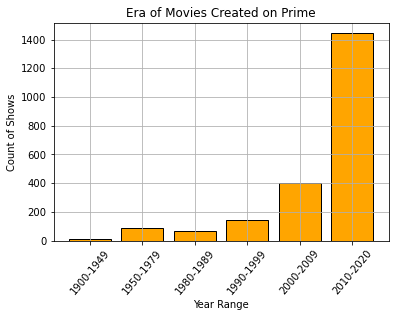

In [9]:
# Create bar chart represeting year range 

ranges = age_range_df["Age Range"].count()
plt.bar(groups, ranges, color = 'orange', edgecolor = 'black');
plt.title('Era of Movies Created on Prime');
plt.xlabel('Year Range')
plt.ylabel('Count of Shows')
plt.xticks(rotation=50);
plt.grid();
plt.savefig("../Charts/prime_eras.pdf")

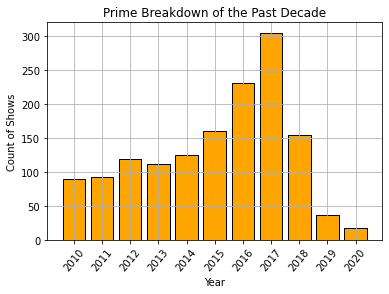

In [10]:
# Bar chart to breakdown number of movies per year in the last decade

prime_years = prime_df.groupby("Year")
prime_year_count = prime_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(top_11_years,prime_year_count['Title'], color = 'orange', edgecolor = 'black');
plt.title('Prime Breakdown of the Past Decade')
plt.xlabel('Year');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();
plt.savefig("../Charts/prime_decade.pdf")

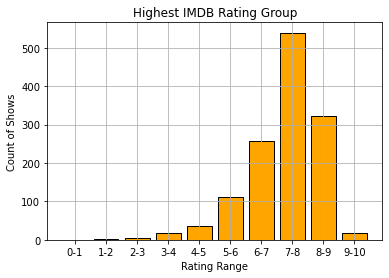

In [11]:
# Group IMDB ratings into bins to create a bar graph

bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
prime_df['IMDB Rating Ranges'] = pd.cut(prime_df['IMDB'], bins2, labels=groups2)

imdb_rating_ranges = prime_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()

plt.bar(groups2, ranges2, color = 'orange', edgecolor = 'black');
plt.title('Highest IMDB Rating Group');
plt.xlabel('Rating Range');
plt.ylabel('Count of Shows');
plt.grid();

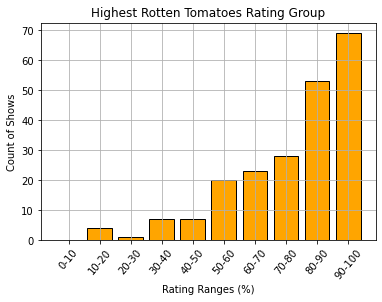

In [12]:
# Group Rotten Tomatoes ratings into bins to create a bar graph

bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
prime_df_dropped['RT Rating Ranges'] = pd.cut(prime_df_dropped['RT'], bins3, labels=groups3)

rt_rating_ranges = prime_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()

plt.bar(groups3, ranges3, color = 'orange', edgecolor = 'black');
plt.title('Highest Rotten Tomatoes Rating Group')
plt.xlabel('Rating Ranges (%)')
plt.ylabel('Count of Shows')
plt.xticks(rotation=50);
plt.grid();

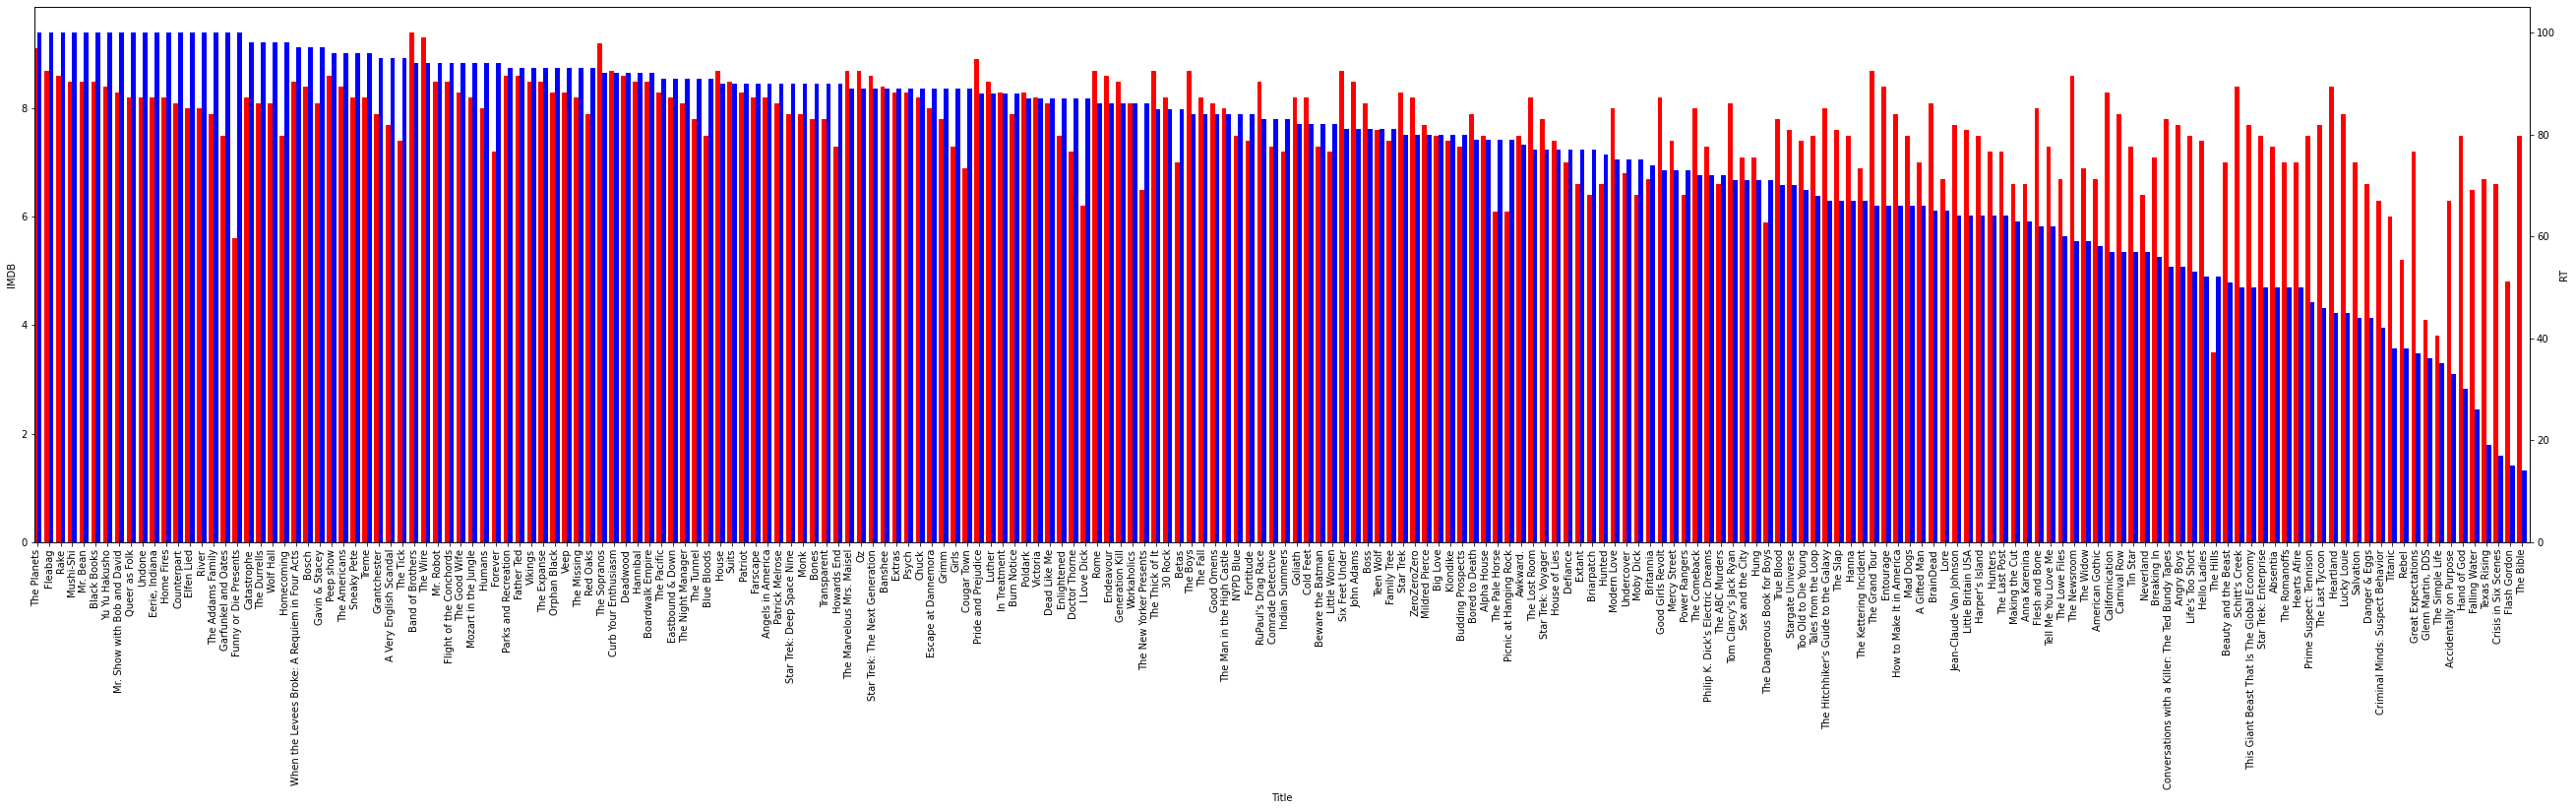

In [13]:
# Compares each show's IMDB and Rotten Tomatoes' rating

fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(121)
ax2 = ax.twinx()
width = 0.4
prime_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1);
prime_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');

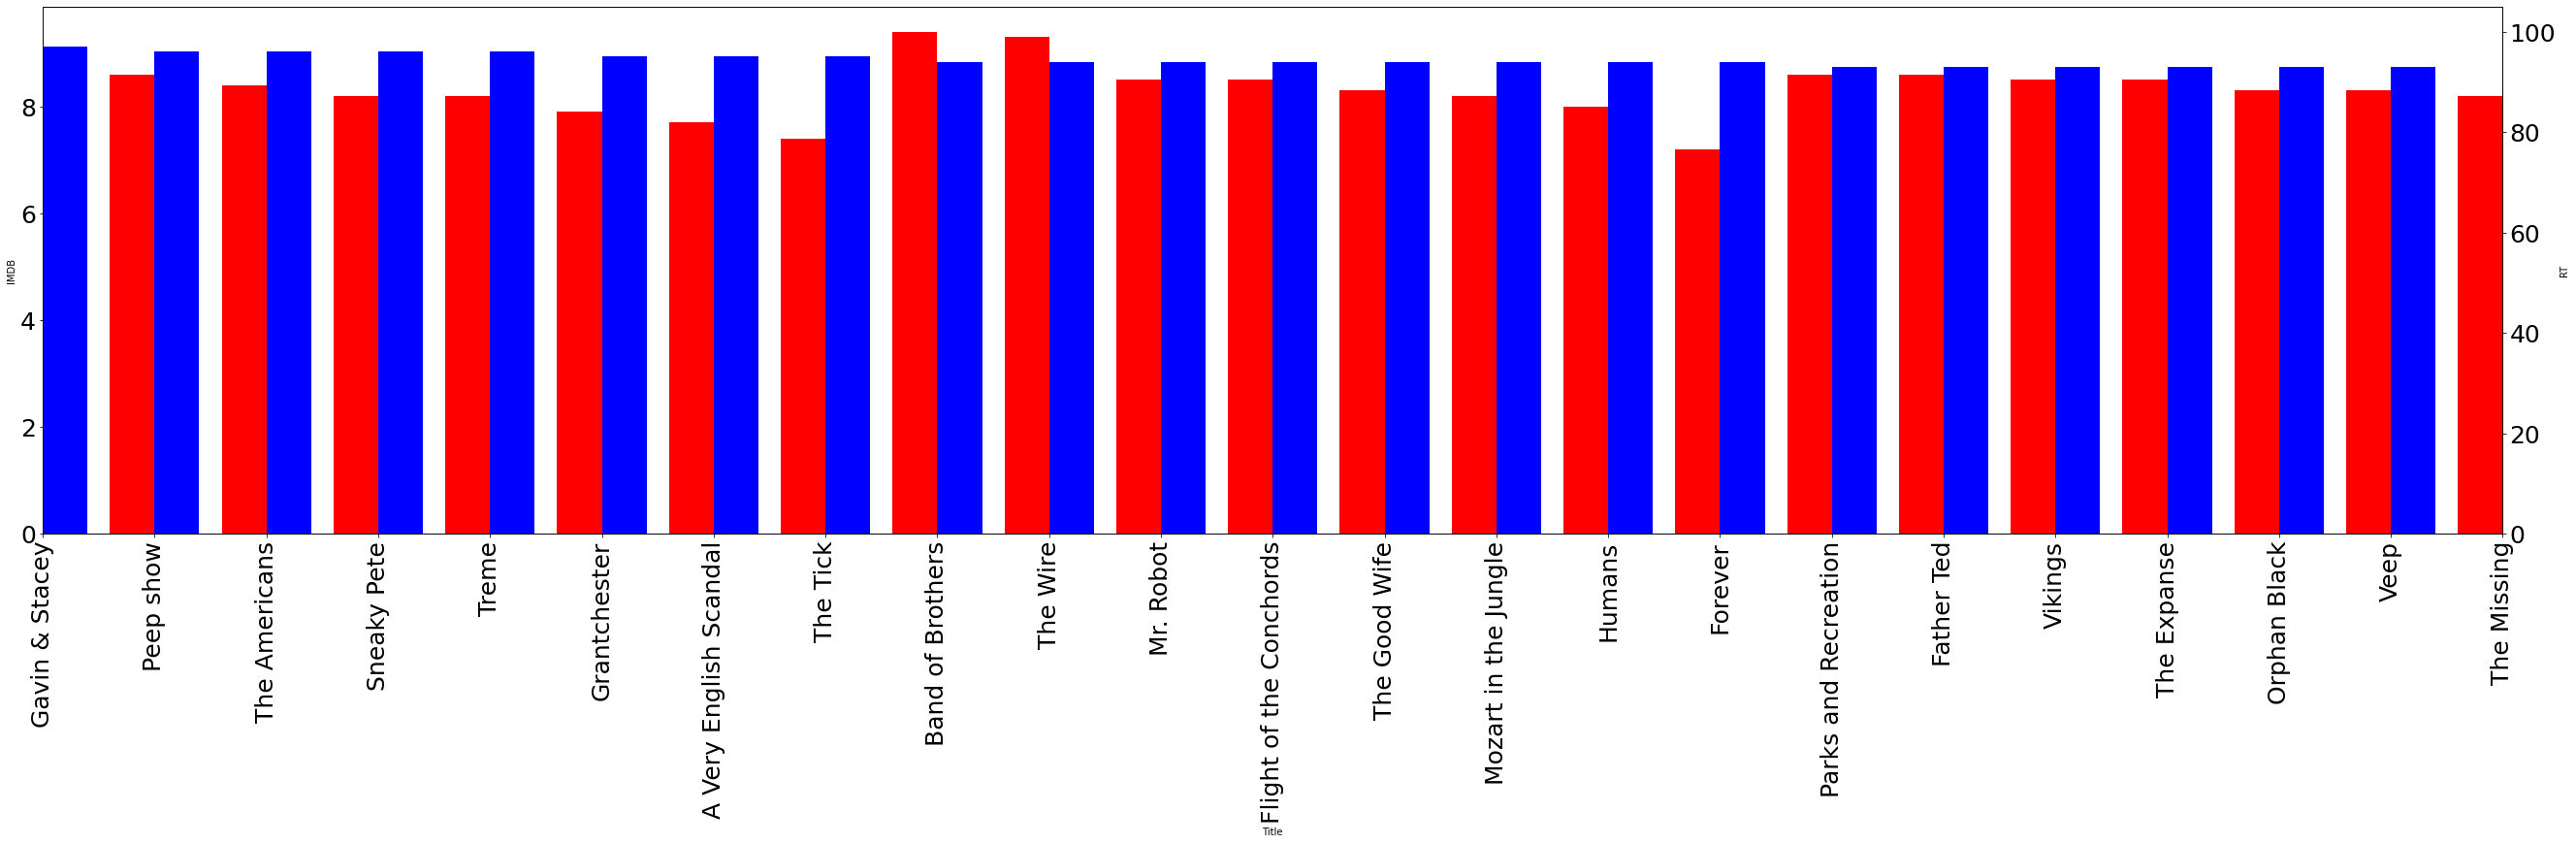

In [14]:
# Zoomed in chart of the above

fig = plt.figure(figsize=(100,10)) 
ax = fig.add_subplot(121) 
ax2 = ax.twinx()
width = 0.4
prime_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1, fontsize=25);
prime_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=25);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');
plt.xlim(24, 46);

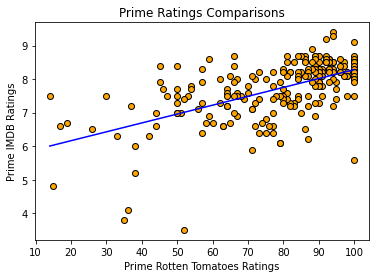

The correlation between both factors is 0.57


<Figure size 432x288 with 0 Axes>

In [15]:
# Find any correlation between IMDB & Rotten Tomatoes ratings using scatter plot

prime_RT = prime_df_dropped['RT']
prime_IMBD_ratings = prime_df_dropped['IMDB']

x_values = prime_RT
y_values = prime_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(prime_RT,prime_IMBD_ratings, facecolor='orange', edgecolor="black");
plt.plot(x_values,regress_values,"b-")
plt.title('Prime Ratings Comparisons')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Prime Rotten Tomatoes Ratings')
plt.ylabel('Prime IMDB Ratings')
plt.xlim = (0,100)
plt.show()

correlation = st.pearsonr(prime_RT,prime_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("../Charts/prime_correlation.pdf")

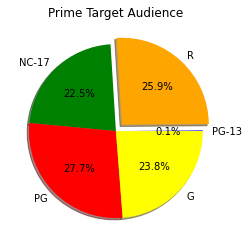

In [17]:
#Netflix target audience pie chart

prime_age_group = prime_df.groupby("Age")
age_count = prime_age_group.count()

explode = (0,0.1,0,0,0)
labels = ['PG-13','R','NC-17','PG','G']
colors = ['blue','orange','green','red','yellow']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = colors,autopct="%1.1f%%", shadow=True);
plt.title('Prime Target Audience');
plt.savefig("../Charts/prime_audience.pdf")